In [1]:
# import basic data package
import numpy as np
import pandas as pd

In [2]:
# read the data
data = pd.read_csv("data\\76 - Hitters.csv")

In [3]:
# see unique values on categorical data
print('the divisions are :', data['Division'].unique())
print('the League are :', data['League'].unique())
print('the new league are :', data['NewLeague'].unique())

the divisions are : ['E' 'W']
the League are : ['A' 'N']
the new league are : ['A' 'N']


In [4]:
# change the categorical data into numbers using dummy pandas
data_dummy_converted = pd.get_dummies(data=data, columns=['League', 'Division', 'NewLeague'], drop_first=1)

In [5]:
# checking missing values
data_dummy_converted.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

In [6]:
# clean the missing values
data_clean = data_dummy_converted.dropna()

In [7]:
# import visualization library
import seaborn as sns
import matplotlib.pyplot as plt

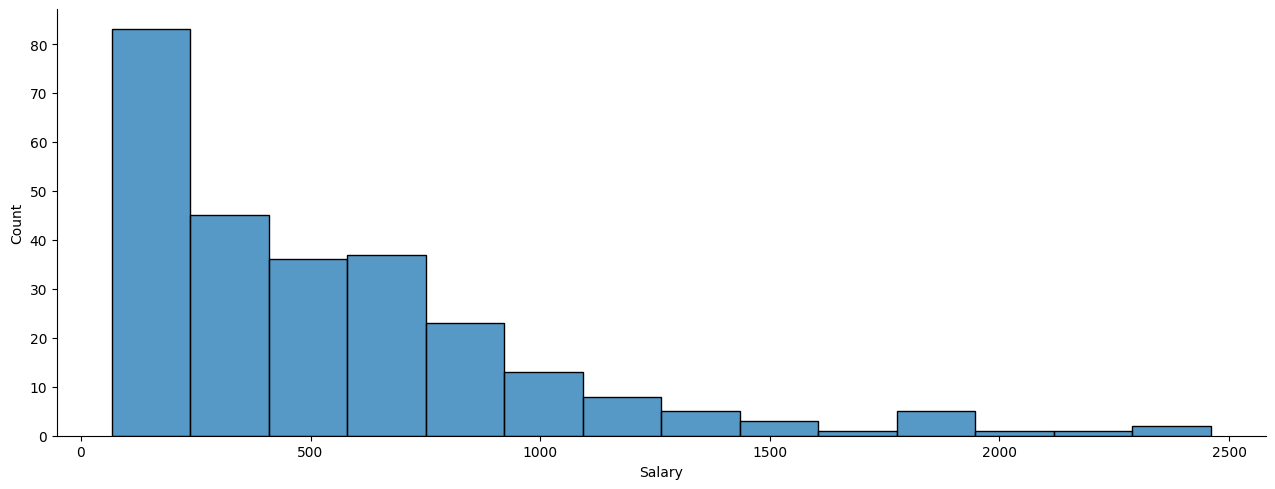

In [8]:
# see distribution by salary
sns.displot(data_clean['Salary'], aspect=18/7)

In [9]:
# checking correlation between variable
correlation = data_clean.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

<Axes: >

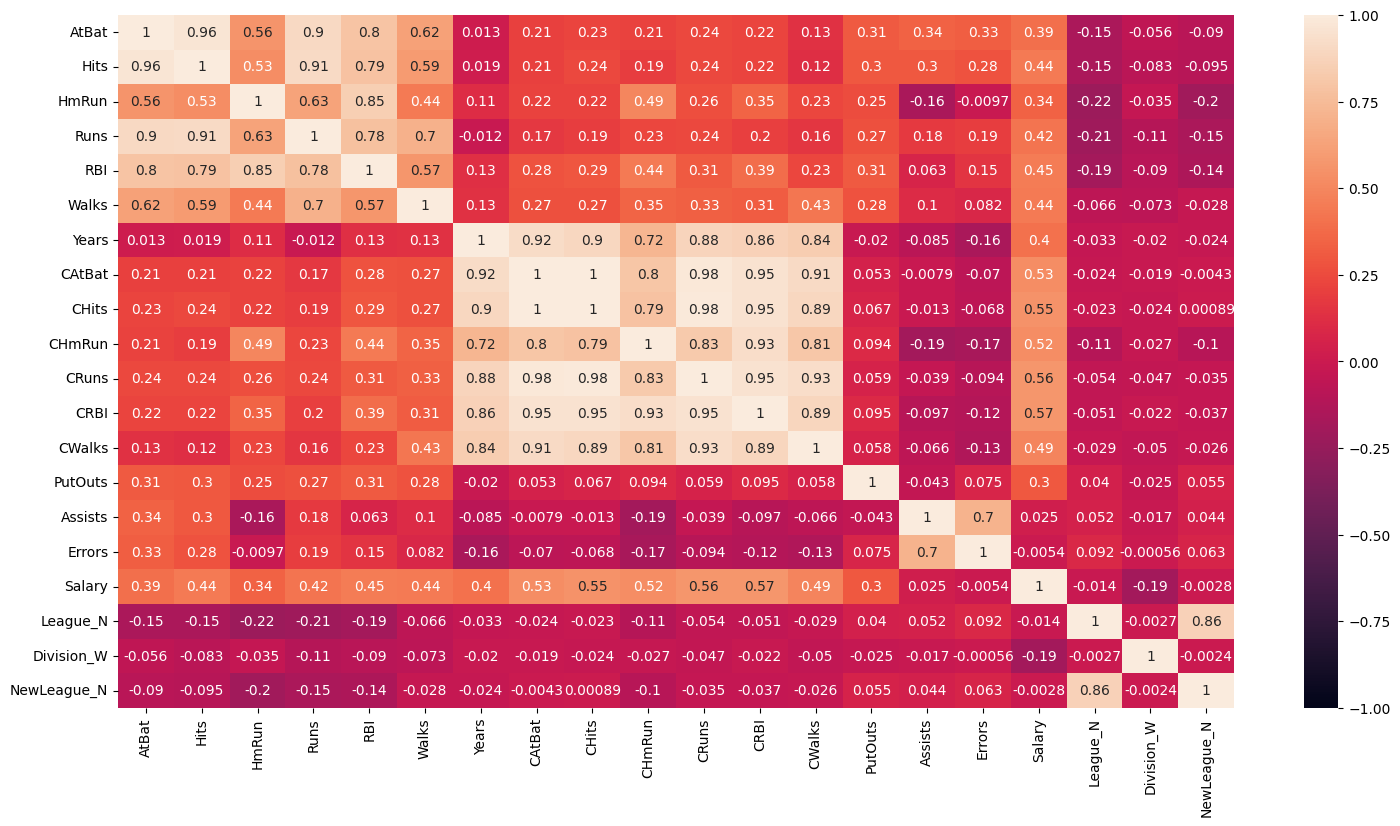

In [10]:
# visualizing the correlation
plt.figure(figsize=(18,9))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [11]:
# split dataframe into feature and target
x = data_clean.drop('Salary', axis=1)
y = data_clean['Salary']

In [12]:
# split data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=365)

In [13]:
# scaler data train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# import regression library
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

In [15]:
# fit the train data using linear regression
linear = LinearRegression()
linear_model = linear.fit(x_train, y_train)

In [16]:
# predict y using x_test data
y_pred_linear_model = linear_model.predict(x_test)

In [17]:
# compare predicted data to actual data
compare = pd.DataFrame({'Predicted': y_pred_linear_model, 'Actual': y_test})

In [18]:
# calculate evaluate prediction
from sklearn.metrics import mean_squared_error
print('RMSE is :', mean_squared_error(y_true=y_test, y_pred=y_pred_linear_model, squared=False))
print('Training Score is :', linear_model.score(x_train, y_train))
print('Test Score is :', linear_model.score(x_test, y_test))

RMSE is : 313.23956789940615
Training Score is : 0.5680589160518967
Test Score is : 0.34559948297363363


In [19]:
# import cross validataion
from sklearn.model_selection import RepeatedKFold

In [20]:
# set the cross validataion
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [21]:
#fit the data using ridgeCV
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_squared_error')
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)

In [22]:
# see rigde tuning parameter
print('Ridge Tuning Parameter is :', ridge.alpha_)

Ridge Tuning Parameter is : 9.9


In [23]:
#  calculate evaluate prediction
print('RMSE Ridge is :', mean_squared_error(y_true=y_test, y_pred=ridge_predict, squared=False))
print('Ridge Training Score is :', ridge.score(x_train, y_train))
print('Ridge Test Score is :', ridge.score(x_test, y_test))

RMSE Ridge is : 288.62308325272807
Ridge Training Score is : 0.5278667721769685
Ridge Test Score is : 0.4444124247349731
